# Project

In [3]:
# imports
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

### Data importation and format

In [4]:
file = 'survey_results_public.csv'
data = {}
with open(file, 'r') as csvfile:
    table = csv.DictReader(csvfile, delimiter=',')
    table = list(table)
    print(len(table))
    data = {key: [row[key] for row in table] for key in table[0]}

88883


In [5]:
def parse_age(x):
    if x == 'Older than 85':
        return 85
    elif x == 'Younger than 5 years':
        return 5
    else:
        return float(x)

age_mat = np.array(
        [
            [parse_age(x), parse_age(y)] 
            for x, y in zip(data['Age'], data['Age1stCode'])
            if x != 'NA' and y != 'NA'
        ]
    )

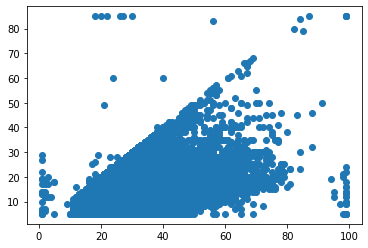

In [30]:
plt.scatter(*age_mat.T)
plt.show()

In [16]:
age_mat = age_mat[0:100, :]

In [17]:
Z = linkage(age_mat, 'single')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [40.0, 40.0, 71.25, 71.25],
  [25.0, 25.0, 55.625, 55.625],
  [15.0, 15.0, 40.3125, 40.3125],
  [5.0, 5.0, 27.65625, 27.65625]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 2.23606797749979, 2.23606797749979, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 3.1622776601683795, 3.1622776601683795, 2.0],
  [2.23606797749979, 4.123105625617661, 4.123105625617661, 3.1622776601683795],
  [1.0, 5.0, 5.0, 4.123105625617661],
  [0.0, 7.0, 7.0, 5.0],
  [0.0, 8.06225774829855, 8.06225774829855, 7.0],
  [0.0, 12.36931687685298, 12.36931687685298, 8.06225774829855]],
 'ivl': ['6', '0', '2', '8', '9', '4', '5', '1', '3', '7'],
 'leaves': [6, 0, 2, 8, 9, 4, 5, 1, 3, 7],
 'color_list': ['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'b']}

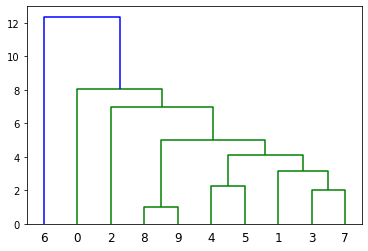

In [18]:
dendrogram(Z)